# Chapter 6: Decision Trees

## Decision tree example

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width y = iris.target
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

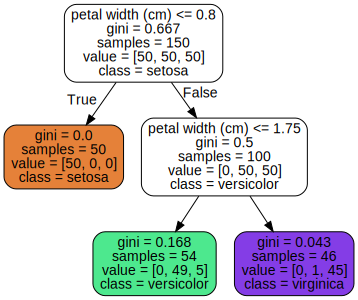

In [18]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source

def print_dt(tree_clf, feature_names=None, class_names=None):
    graph = Source(export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    ))
    return SVG(graph.pipe(format='svg'))
    
print_dt(tree_clf, iris.feature_names[2:], iris.target_names)

#### Note:

* A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.
* $G_i = 1 - \sum\limits_{k=1,...,n}p_{i,k}^2$ for node $k$ and instance class $k$.

## Training decision trees

* Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees.
* It is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level.
* Finding the optimal tree is known to be an NP-Complete problem. CARTs greedy solution is $O(n \times m \times log(m))$.
* The cost is given by: $J(k,t_k)=\frac{samples_{left}}{samples}G_{left} + \frac{samples_{right}}{samples}G_{right}$.

#### Note:
* Regularization is controlled by options: min_samples_split, min_samples_leaf, max_leaf_nodes, max_features and min_weight_fraction.
* DTs are sensitive to: (1) rotation of dataset inputs, (2) small variations in the training data.

## Decision Trees for Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor 
import numpy as np
np.random.seed(42)
X = np.linspace(0.0,10.0,200).reshape(-1, 1)
y = 2 * X ** 2 + 3 * X + np.random.uniform(0.0,0.1,200).reshape(-1, 1)
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

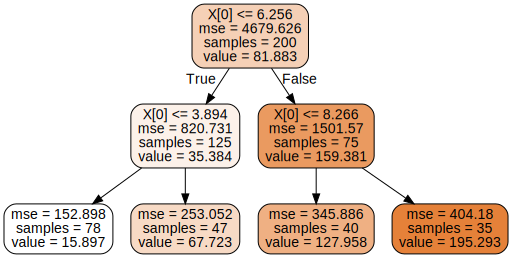

In [29]:
print_dt(tree_reg)

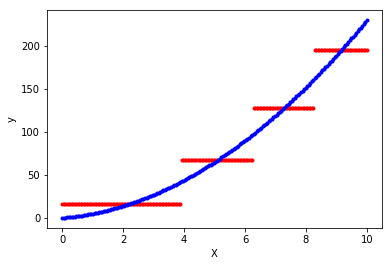

In [32]:
import matplotlib
import matplotlib.pyplot as plt
# Plot it
plt.plot(X, tree_reg.predict(X), "r.") # add line '-'
plt.plot(X, y, "b.") # add samples as dots '.'
plt.xlabel('X')
plt.ylabel('y')
plt.show()